# Heart Attack Prediction

<br> Given a dataset with heart conditions classified by label 'patient had a heart attack'(0) and 'patient hadn't a heart attack',
<br> Is it possible to predict a heart attack?

<img src="https://i.pinimg.com/originals/73/8d/19/738d1965e386bf4fe4dc7dd008cca854.gif"
     alt="Heart Attack Meme icon"
      />
     
## Problem: Predict if the pacient have or not a heart attack.

Defined the problem, first we need to know our dataset before to start modelling.

So, let's start with dataset meta-data: 

### Meta-data Dataset

<p class="small-heading"><b>Data Set Information:</b></p>
<p class="normal">This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to
<br> this date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
<br>   
<br>The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.
<br>
<br>One file has been "processed", that one containing the Cleveland database.  All four unprocessed files also exist in this directory.
<br>
<br>To see Test Costs (donated by Peter Turney), please see the folder "Costs" </p>

<br>

<p class="small-heading"><b>Attribute Information:</b></p>
<p class="normal">Only 14 attributes used:
<br>      1. #3  (age)       
<br>      2. #4  (sex)       
<br>      3. #9  (cp)        
<br>      4. #10 (trestbps)  
<br>      5. #12 (chol)      
<br>      6. #16 (fbs)       
<br>      7. #19 (restecg)   
<br>      8. #32 (thalach)   
<br>      9. #38 (exang)     
<br>      10. #40 (oldpeak)   
<br>      11. #41 (slope)     
<br>      12. #44 (ca)        
<br>      13. #51 (thal)      
<br>      14. #58 (num)       (the predicted attribute)
    
    
Some definitions
    
* id: patient identification number
    
* ccf: social security number (I replaced this with a dummy value of 0)
     
* age: age in years
    
* sex: sex (1 = male; 0 = female)
    
* painloc: chest pain location (1 = substernal; 0 = otherwise)
    
* painexer (1 = provoked by exertion; 0 = otherwise)
    
* relrest (1 = relieved after rest; 0 = otherwise)
    
* pncaden (sum of 5, 6, and 7)

* cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
    
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    
* chol: serum cholestoral in mg/dl
    

* prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)

* thalach: maximum heart rate achieved

* slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
       
* ca: number of major vessels (0-3) colored by flourosopy
    
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

##### Good! with this all info, we can proceed

# Loading packages

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import io
import requests
import matplotlib.pyplot as plt  
from sklearn.pipeline import Pipeline, FeatureUnion
from collections import Counter
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.compose import ColumnTransformer
import sklearn.metrics  
from mlxtend.classifier import StackingCVClassifier
from catboost import CatBoostClassifier


%matplotlib inline
sns.set(style="ticks", context="poster")

Using TensorFlow backend.


# Loading Dataset & Pre-processing

In [2]:
url_kaggle = 'https://www.kaggle.com/ronitf/heart-disease-uci/download'
heart = pd.read_csv('Datasets/heart.csv')
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
# Checking for null values in DS
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Showing Cor between variables: 


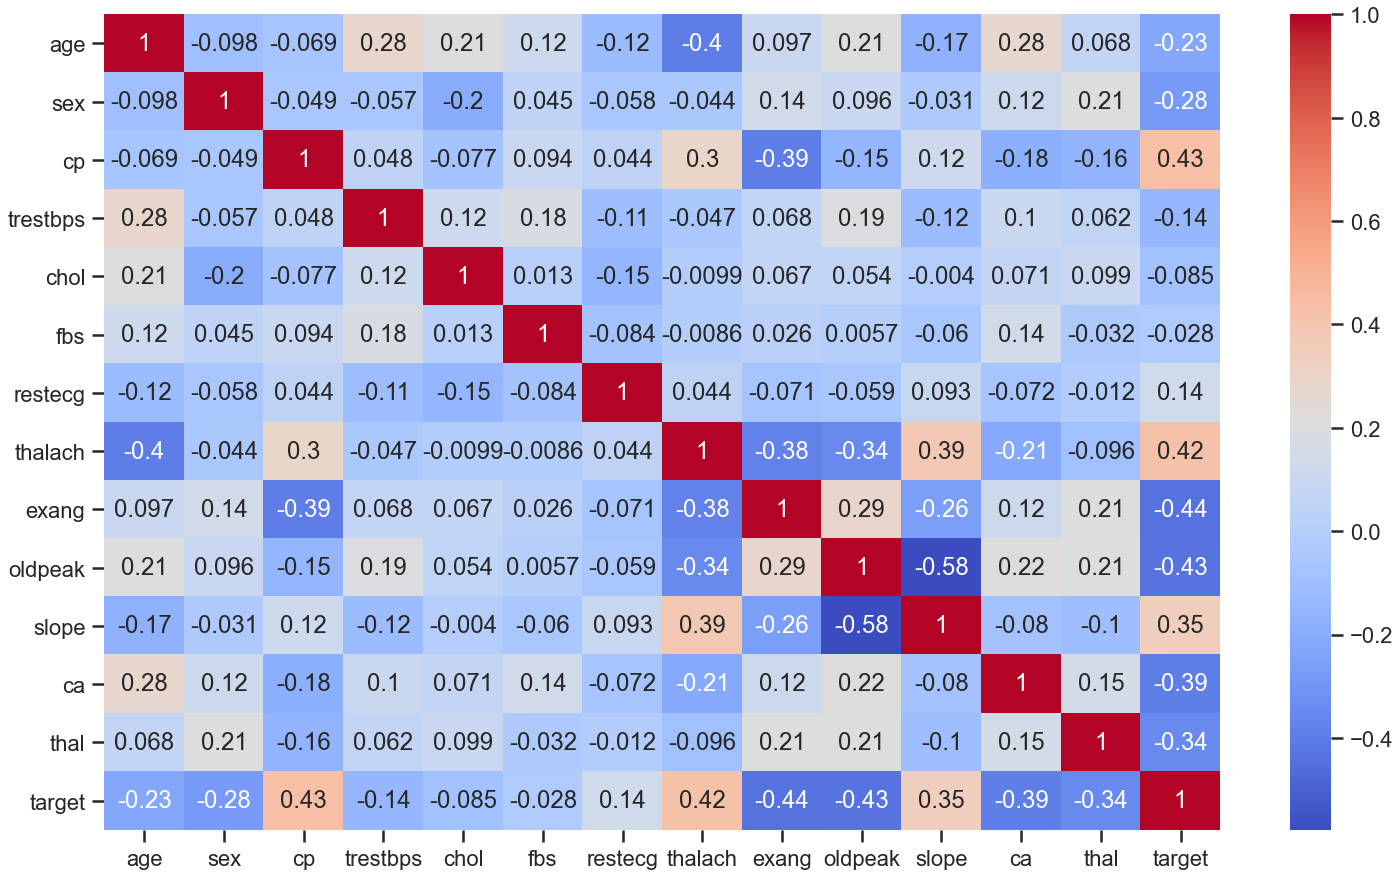

In [4]:
print("Showing Cor between variables: ")
plt.figure(figsize=(25,15))
sns.heatmap(heart.corr(),annot=True,cmap='coolwarm')

# Modelling

Ok, now that we have saw all the correlation between the feature (for example, we can look how 
the maximum heart rate achieved, the chest pain type and the slope have its importance 
to predict the heart attack)
## First part: Define all possible models

In [5]:
#Splitting and scaling
X_train, X_test, y_train, y_test = train_test_split(heart.drop('target',axis=1), heart["target"], test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train_ori = X_train
X_test_ori = X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [6]:
lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("Confusion Matrix...",'\n')
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

Confusion Matrix... 

[[21  6]
 [ 3 31]]


Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



### CatBoosting

In [7]:
cat = CatBoostClassifier(task_type="GPU",
                           devices='0:1')
cat.fit(X_train, y_train, verbose=False)
cat_predicted = cat.predict(X_test)
cat_conf_matrix = confusion_matrix(y_test, cat_predicted)
cat_acc_score = accuracy_score(y_test, cat_predicted)
print("Confusion Matrix...")
print(cat_conf_matrix)
print("\n")
print("Accuracy of CatBoost:",cat_acc_score*100,'\n')
print(classification_report(y_test,cat_predicted))

Confusion Matrix...
[[23  4]
 [ 4 30]]


Accuracy of CatBoost: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Random Forest

In [8]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Confusion matrix...")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

Confusion matrix...
[[23  4]
 [ 4 30]]


Accuracy of Random Forest: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Support Vector Machine Classifier

In [9]:
svc = SVC()
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("Confusion matrix...")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

Confusion matrix...
[[21  6]
 [ 2 32]]


Accuracy of Support Vector Classifier: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



### Multi Layer Perceptron

In [10]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp_predicted = mlp.predict(X_test)
mlp_conf_matrix = confusion_matrix(y_test, mlp_predicted)
mlp_acc_score = accuracy_score(y_test, mlp_predicted)
print("confussion matrix")
print(mlp_conf_matrix)
print("\n")
print("Accuracy of MLP Classifier:",mlp_acc_score*100,'\n')
print(classification_report(y_test,mlp_predicted))

confussion matrix
[[23  4]
 [ 3 31]]


Accuracy of MLP Classifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



C:\Anaconda3\envs\Alpha\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Mixing all together: Ensemble Model

Good! Now we can see that all model reach in average 80% of accuracy. But if do we put all together and making some ensemble model? what can we reach? 

In [11]:
one_hot_features = ['sex','exang','fbs']
numeric_features = ['age','cp','trestbps','chol','restecg','thalach','oldpeak','slope','ca','thal']

one_hot_transform = Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])
numerical_transform = Pipeline(steps=[
    ('scaler',StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('one',one_hot_transform,one_hot_features),
        ('num',numerical_transform,numeric_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(heart.drop('target',axis=1), heart["target"], test_size=.25)

pipe_lr = Pipeline([
    ('preprocessor',preprocessor),
    ('clf',LogisticRegression(verbose=1))
])
cat_target = [0, 1]                          
pipe_cat = Pipeline([
    ('preprocessor',preprocessor),
    ('clf',CatBoostClassifier(task_type="GPU", 
                              devices='0:1',
                              eval_metric = 'Accuracy',
                              verbose=False))
])

pipe_rf = Pipeline([
    ('preprocessor',preprocessor),
    ('clf',RandomForestClassifier())
])

pipe_svm = Pipeline([
    ('preprocessor',preprocessor),
    ('clf',SVC())
])

pipe_mlp = Pipeline([
    ('preprocessor',preprocessor),
    ('clf',MLPClassifier())
])

pipe_est = Pipeline([
    ('clf', VotingClassifier(estimators=[("mlp",pipe_mlp), ("svm",pipe_svm),("rf",pipe_rf),("cat",pipe_cat),("lr",pipe_lr)]))
])
#Hyperparameters already ajusted for the best combination
params_lr={
    'clf__rf__clf__max_depth' : [5],
    'clf__rf__clf__n_estimators' : [20],
    'clf__rf__clf__random_state' : [12],
    'clf__svm__clf__C': [2], 
    'clf__mlp__clf__activation' : ['logistic'],
    'clf__mlp__clf__learning_rate_init' : [0.001],
    'clf__cat__clf__iterations': [100],
    'clf__cat__clf__learning_rate': [0.001]
}

clf = GridSearchCV(pipe_est, param_grid = params_lr, cv = 2, verbose=0,n_jobs=-1)
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('clf',
                                        VotingClassifier(estimators=[('mlp',
                                                                      Pipeline(steps=[('preprocessor',
                                                                                       ColumnTransformer(transformers=[('one',
                                                                                                                        Pipeline(steps=[('onehot',
                                                                                                                                         OneHotEncoder(handle_unknown='ignore'))]),
                                                                                                                        ['sex',
                                                                                                                         'exang',
                                          

In [12]:
ensamble_clf = clf.predict(X_test)
ensamble_clf_conf_matrix = confusion_matrix(y_test, ensamble_clf)
ensamble_clf_acc_score = accuracy_score(y_test, ensamble_clf)
print("confussion matrix")
print(ensamble_clf_conf_matrix)
print("\n")
print("Accuracy of Ensamble Method:",ensamble_clf_acc_score*100,'\n')
print(classification_report(y_test,ensamble_clf))

confussion matrix
[[21  5]
 [ 3 47]]


Accuracy of Ensamble Method: 89.47368421052632 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.90      0.94      0.92        50

    accuracy                           0.89        76
   macro avg       0.89      0.87      0.88        76
weighted avg       0.89      0.89      0.89        76



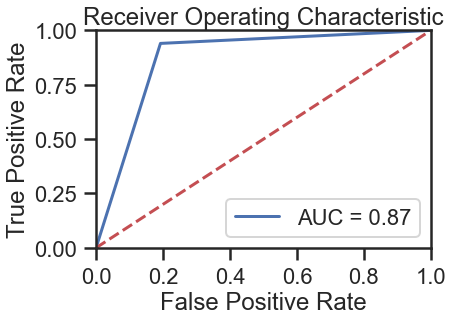

In [13]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, ensamble_clf)
roc_auc = sklearn.metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()